# Descobrir quais disciplinas precisam de uma atenção maior
Objetivo: destacar graficamente quais disciplinas os professores vão precisar tomar atitudes para melhorar o rendimento dos alunos

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trazendo as informações do banco de dados

In [19]:
# Obtendo o diretório atual
diretorio_atual = os.getcwd()

# Construindo o caminho completo para o arquivo Excel
caminho_arquivo_excel = os.path.join(diretorio_atual, 'dados_academicos.xlsx')

# Lendo o arquivo Excel
dados_excel = pd.read_excel(caminho_arquivo_excel)


# Notas dos alunos durante ano inteiro de 2024

Vamos assumir que qualquer média de nota abaixo de 4.0 será considerada como indicativo de que os alunos estão indo mal na disciplina.

In [20]:
ano_interesse = 2024
nota_interesse = 4

# Filtrando para o semestre e ano de interesse
dados_filtro = dados_excel[(dados_excel['ano'] == ano_interesse)]

## Indicadores Gerais

In [17]:
# Número de disciplinas
num_disciplinas = dados_filtro['disciplina_id'].nunique()

# Número total de estudantes
num_estudantes = dados_filtro['aluno_id'].nunique()

# Média geral das notas
media_geral_notas = dados_filtro['notas'].mean()

# Calculando a média das notas para cada semestre
media_notas_semestre = dados_filtro.groupby('semestre')['notas'].mean()

print("Indicadores Gerais:")
print("===================")
print(f"Número de Disciplinas: {num_disciplinas}")
print(f"Número Total de Estudantes: {num_estudantes}")
print(f"Média Geral das Notas: {media_geral_notas:.2f}")
print("\nMédia das Notas por Semestre:")
for semestre, media in media_notas_semestre.items():
    print(f"- {semestre}: {media:.2f}")

Indicadores Gerais:
Número de Disciplinas: 5
Número Total de Estudantes: 10
Média Geral das Notas: 5.17

Média das Notas por Semestre:
- A: 4.46
- B: 5.88


## Distribuição das notas por semestre

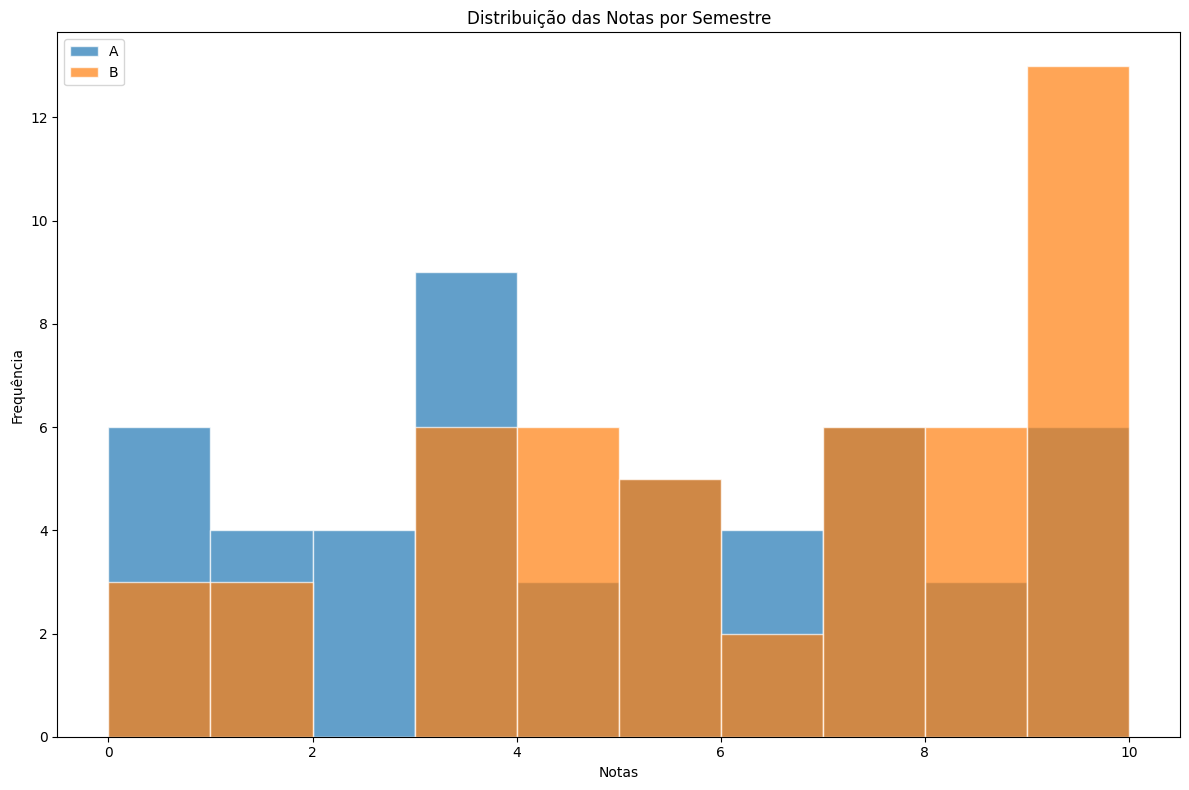

In [61]:
plt.figure(figsize=(12, 8))
for semestre in dados_filtro['semestre'].unique():
    plt.hist(dados_filtro[dados_filtro['semestre'] == semestre]['notas'], bins=10, edgecolor='white', label=semestre, alpha=0.7)

# Anotações
plt.title('Distribuição das Notas por Semestre')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

## Evolução da nota média por disciplina

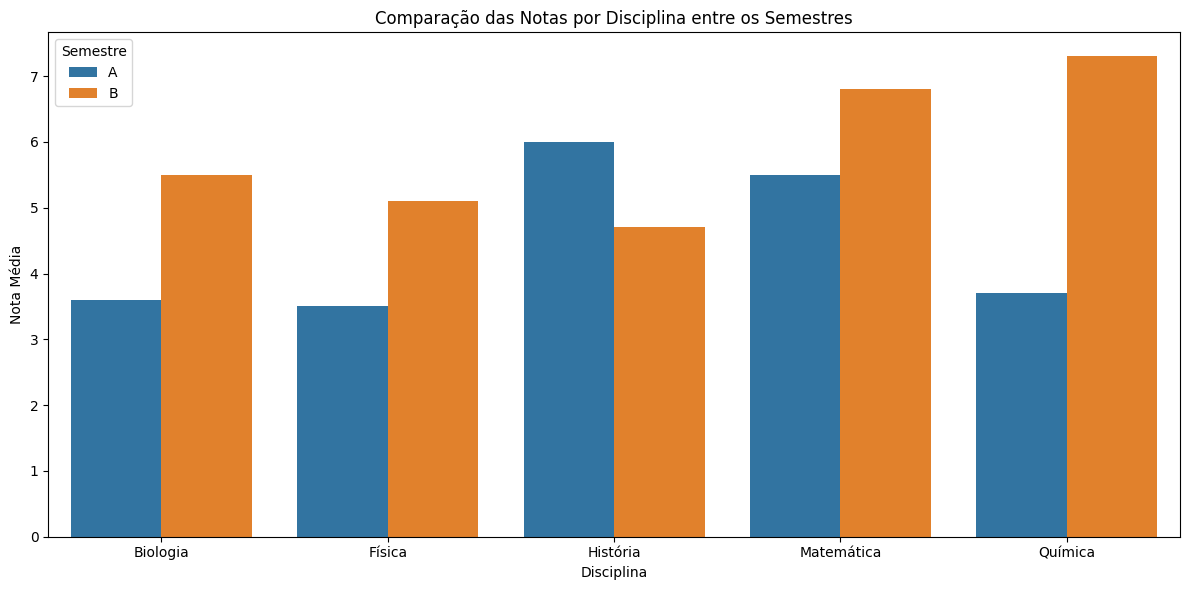

In [21]:
# Filtrando apenas as colunas relevantes
dados_semestre = dados_filtro[['ano', 'semestre', 'nome_disciplina', 'notas']]

# Agrupando por ano, semestre e disciplina e calculando a média das notas
media_notas = dados_semestre.groupby(['ano', 'semestre', 'nome_disciplina']).mean().reset_index()

# Criando o gráfico de barras agrupadas para comparar as notas entre os semestres
plt.figure(figsize=(12, 6))
sns.barplot(data=media_notas, x='nome_disciplina', y='notas', hue='semestre')
plt.title('Comparação das Notas por Disciplina entre os Semestres')
plt.xlabel('Disciplina')
plt.ylabel('Nota Média')
plt.legend(title='Semestre')
plt.tight_layout()
plt.show()

## Disciplina que teve maior rendimento percentual entre os semestres

In [45]:
# Calculando a média das notas de cada disciplina para cada semestre
media_notas = dados_filtro.groupby(['nome_disciplina', 'semestre'])['notas'].mean().unstack()

# Calculando a diferença de rendimento entre os semestres
diferenca_rendimento = media_notas.pct_change(axis=1)

# Identificando a disciplina com maior aumento percentual no rendimento
maior_aumento_percentual = diferenca_rendimento.idxmax().iloc[1]
maior_diminuicao = diferenca_rendimento.idxmin().iloc[1]

# Exibindo o resultado
print(f"Disciplina com maior aumento percentual no Rendimento: {maior_aumento_percentual} com {diferenca_rendimento.max().max() * 100:.2f}%")
print(f"Disciplina com maior retração percentual no Rendimento: {maior_diminuicao} com {diferenca_rendimento.min().min() * 100:.2f}%")

Disciplina com maior aumento percentual no Rendimento: Química com 97.30%
Disciplina com maior retração percentual no Rendimento: História com -21.67%


C:\Users\matth\AppData\Local\Temp\ipykernel_20884\3390887532.py:8: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  maior_aumento_percentual = diferenca_rendimento.idxmax().iloc[1]
C:\Users\matth\AppData\Local\Temp\ipykernel_20884\3390887532.py:9: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  maior_diminuicao = diferenca_rendimento.idxmin().iloc[1]


## Distribuição de disciplinas por semestre

In [46]:
# Calculando a distribuição das notas por disciplina e semestre
distribuicao_notas = dados_filtro.groupby(['nome_disciplina', 'semestre'])['notas'].describe()

# Exibindo a distribuição das notas
print("Distribuição das Notas por Disciplina e Semestre:")
print(distribuicao_notas)

Distribuição das Notas por Disciplina e Semestre:
                          count  mean       std  min   25%  50%   75%   max
nome_disciplina semestre                                                   
Biologia        A          10.0   3.6  1.955050  0.0  3.00  3.0  5.00   7.0
                B          10.0   5.5  3.566822  0.0  3.25  6.5  8.75   9.0
Física          A          10.0   3.5  2.758824  0.0  1.50  3.0  5.00   8.0
                B          10.0   5.1  2.282786  1.0  3.25  5.5  7.00   8.0
História        A          10.0   6.0  3.162278  0.0  6.00  7.0  7.00  10.0
                B          10.0   4.7  2.584140  1.0  3.25  4.0  5.00  10.0
Matemática      A          10.0   5.5  3.836955  0.0  1.75  6.0  8.75  10.0
                B          10.0   6.8  2.973961  1.0  5.00  7.5  9.00  10.0
Química         A          10.0   3.7  2.790858  0.0  2.00  3.0  4.00   9.0
                B          10.0   7.3  3.267687  0.0  7.25  8.5  9.00  10.0


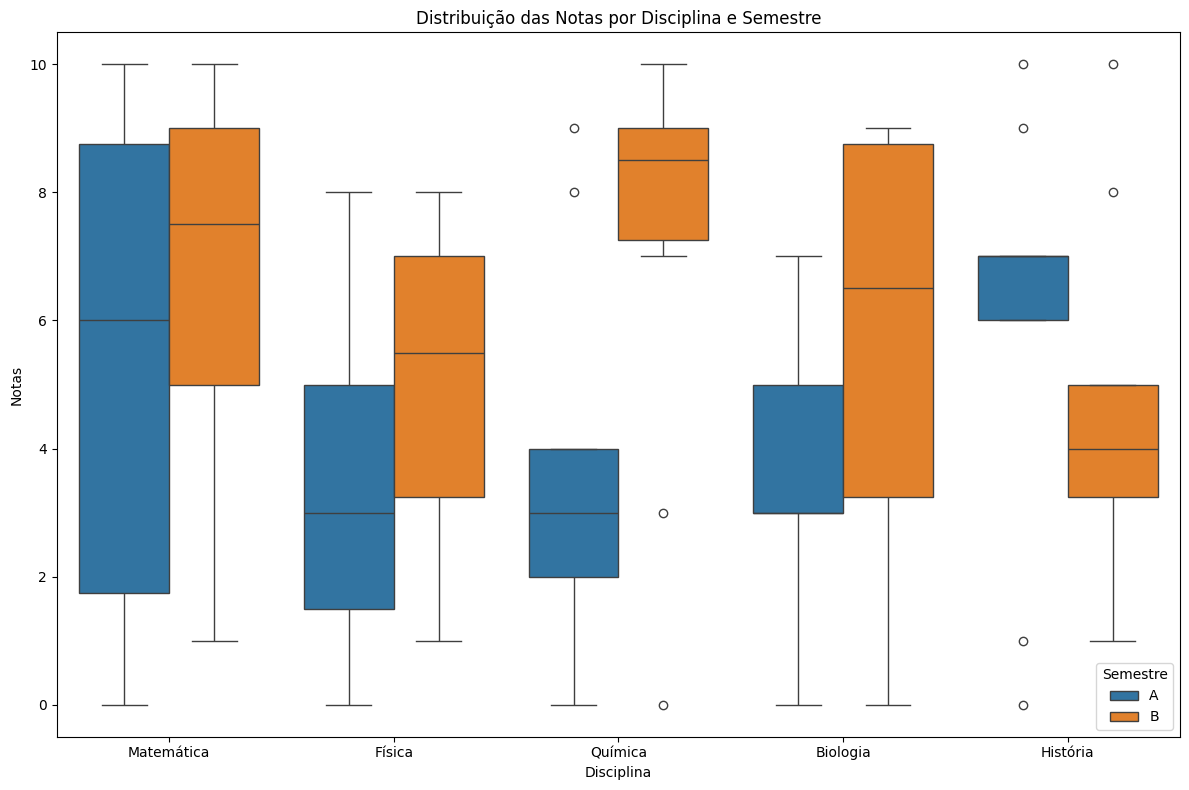

In [51]:

# Criando o gráfico de caixa
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_filtro, x='nome_disciplina', y='notas', hue='semestre')
plt.title('Distribuição das notas por disciplina e semestre')
plt.xlabel('Disciplina')
plt.ylabel('Notas')
plt.legend(title='Semestre')
plt.tight_layout()
plt.show()
